# parties

## Import

importing libraries

In [1]:
import pandas as pd
import pdfplumber
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# read pdf file

In [2]:
# open the pdf file from given path
pdf = pdfplumber.open("/mnt/d/work/notebooks/electoral bond data/elctrol_bond 2.pdf")

In [6]:
# add the all page list into single list
rows = []
for page in tqdm(pdf.pages):
    table = page.extract_table()
    rows.extend(table)
    

100%|█████████████████████████████████████████████████████████████████████████████████████████| 426/426 [01:56<00:00,  3.65it/s]


# make a dataframe

In [7]:
# add into dataframe and remove the frist row and add the column 
df = pd.DataFrame(rows[1:], columns = ["Date of\nEncashment","Name of the Political Party","Denomination"])

In [8]:
df[:5]

,Date of\nEncashment,Name of the Political Party,Denomination
0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"1,00,00,000"
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"


In [9]:
#add into csv file on given path & remove index 
df.to_csv("/mnt/d/work/notebooks/electoral_bond2.csv",index = False)

In [3]:
#read the csv file 
ele = pd.read_csv("electoral_bond2.csv")

# change date time format 

In [7]:
data=ele["Date of\nEncashment"]

In [8]:
new_data = pd.to_datetime(data,format="%d/%b/%Y")

In [9]:
ele["Date of\nEncashment"]=new_data

In [10]:
#ele["year"] = ele["Date of\nEncashment"].dt.year

In [11]:
# ele["Date of\nEncashment"].dt.

In [12]:
#ele

# change object datatype into int datatype

In [13]:
# itrate all dataframe and remove the commas from the ine column 
for index, row in tqdm(ele.iterrows()):
     row["Denomination"] = row["Denomination"].replace(",", "")
type(ele)

20421it [00:00, 24798.20it/s]


pandas.core.frame.DataFrame

In [14]:
ele["Denomination"]=ele["Denomination"].str.replace(",", "")

In [15]:
ele["Denomination"]

0         1000000
1         1000000
2        10000000
3         1000000
4         1000000
           ...   
20416     1000000
20417     1000000
20418     1000000
20419     1000000
20420     1000000
Name: Denomination, Length: 20421, dtype: object

In [16]:
# change  the type of a column and return in same 
ele["Denomination"]=ele["Denomination"].astype(int)

In [17]:
ele[:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date of
Encashment           5 non-null      datetime64[ns]
 1   Name of the Political Party  5 non-null      object        
 2   Denomination                 5 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 248.0+ bytes


In [18]:
ele.to_csv("/mnt/d/work/notebooks/election.csv")
ele[:5]

,Date of\nEncashment,Name of the Political Party,Denomination
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


# group by the all data

In [19]:
# use groupby function to group the all party acc to their bond
group_data = ele.groupby("Name of the Political Party")

In [20]:
# sum of the all bond recevied by party
total = group_data.sum(numeric_only=True)

In [21]:
# sort the acc to bond
group_party=total.sort_values(by=["Denomination"],ascending=False)

In [22]:
group_party.to_csv("/mnt/d/work/notebooks/group_party.csv")

In [23]:
group_party = pd.read_csv("/mnt/d/work/notebooks/group_party.csv")

In [24]:
type(group_party)

pandas.core.frame.DataFrame

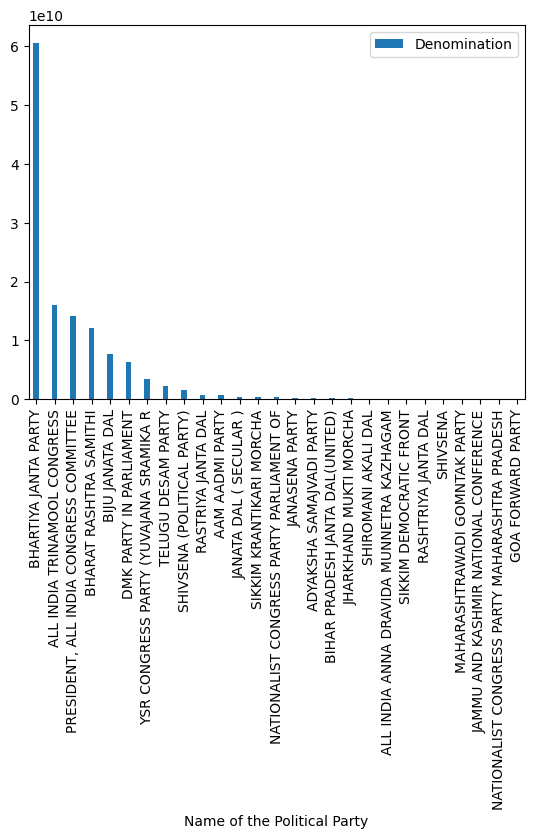

In [33]:
ax = group_party.plot(x = "Name of the Political Party", y = "Denomination",width=.3,kind ="bar")
# min_value = 0
# max_value =  10
# for current_ax in ax:
#     current_ax.set_ylim(min_value, max_value)
plt.subplots_adjust(bottom=0.1)
# Add value labels on each bar


<Axes: xlabel='Name of the Political Party'>

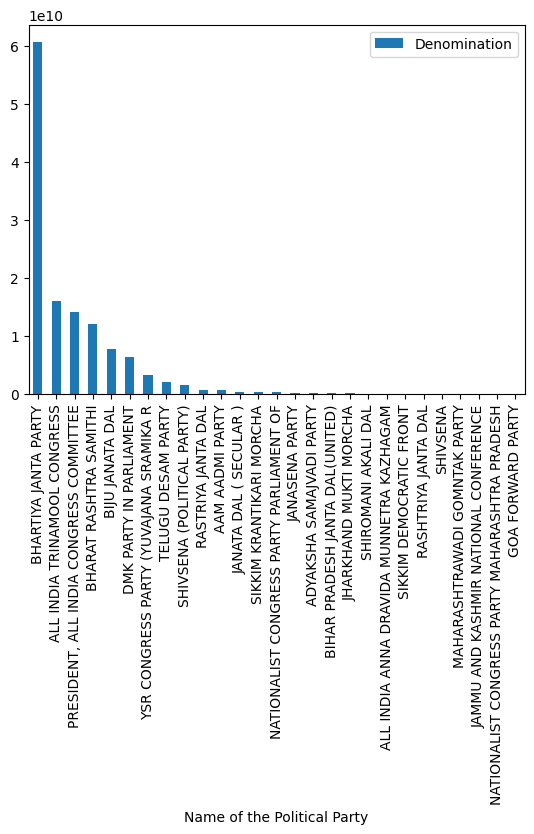

In [31]:
group_party.plot(x = "Name of the Political Party", y = "Denomination", kind = "bar")